In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from rxwgan.wgan import wgan_optimizer
import tensorflow as tf
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from rxwgan.models import Model_v1 as Model
gan = Model(trainable=False)
gan.load('../data/model_v1')

In [15]:
gan.generator.summary()
gan.discriminator.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 64)        32832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)       

In [31]:
tf.keras.utils.plot_model(gan.generator, to_file='generator.pdf', 
                          show_shapes=True, 
                          show_layer_names=True,
                          #show_dtype=False,
                          rankdir='TB',
                          dpi=200)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [30]:
!pip install pydot graphviz

Defaulting to user installation because normal site-packages is not writeable


E: Command line option --user is not understood in combination with the other options


In [8]:
batch_size=1
tb_image_path = '/home/jodafons/public/bric_tb_data/Shenzhen/raw'
train_datagen = ImageDataGenerator( rescale=1./255 )
train_generator = train_datagen.flow_from_directory( tb_image_path, 
                                                     color_mode='grayscale', 
                                                     target_size=(gan.height,gan.width), 
                                                     batch_size=batch_size,
                                                     classes=['tb'] 
                                                     )

Found 336 images belonging to 1 classes.


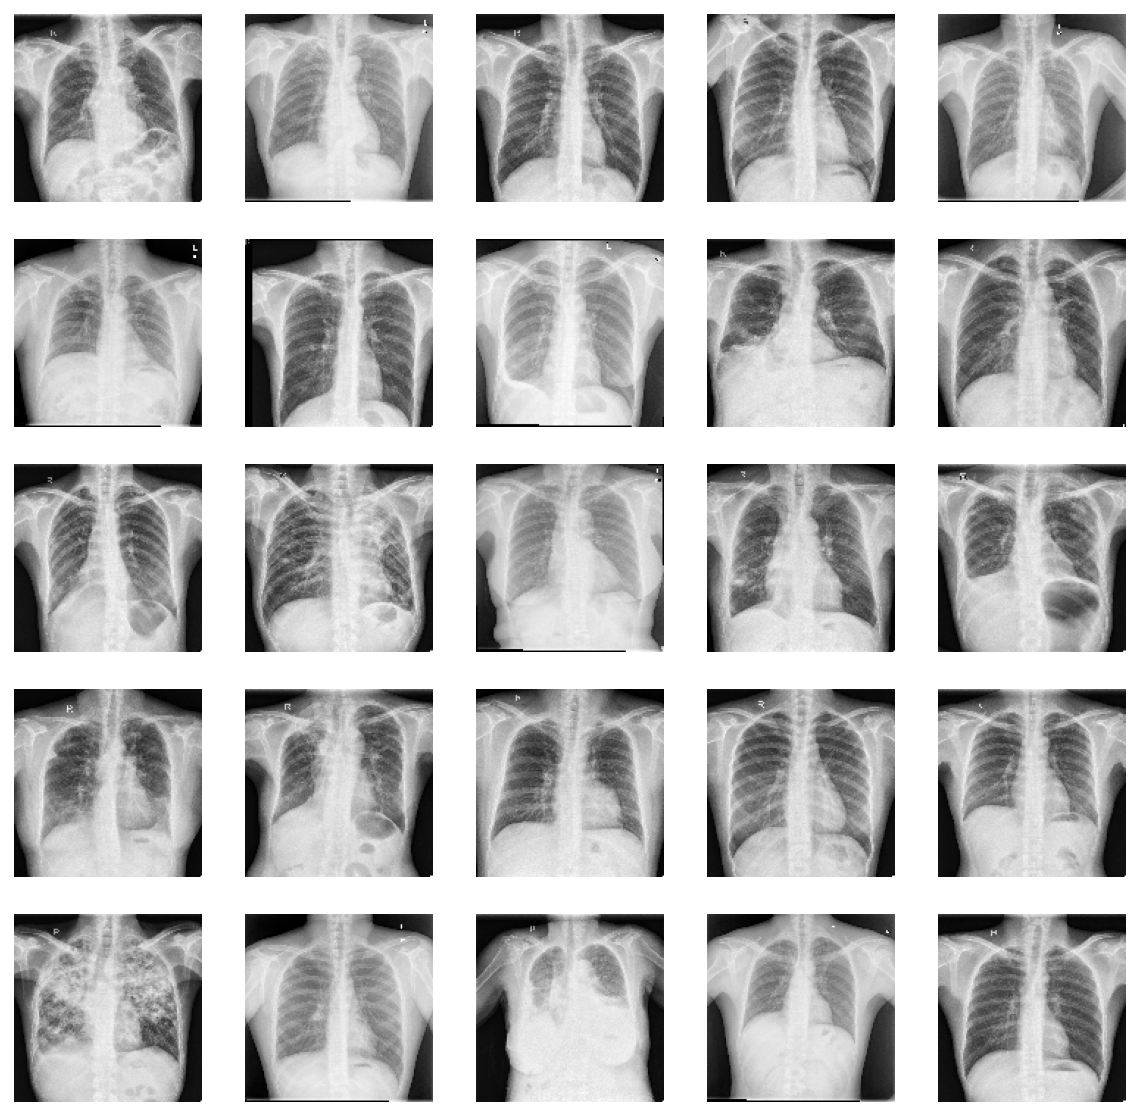

In [18]:
def plot_fakes(output):
    fake_samples = gan.generate(25)
    fig = plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5,5,1+i)
        plt.axis('off')
        plt.imshow(fake_samples[i],cmap='gray')
    fig.savefig(output)

        
def plot_real(output):
    fig = plt.figure(figsize=(10, 10))
    for i in range(25):
        img,_ = train_generator.next()
        plt.subplot(5,5,1+i)
        plt.axis('off')
        plt.imshow(img[0],cmap='gray')
    fig.savefig(output)


plot_real('real_samples.pdf')

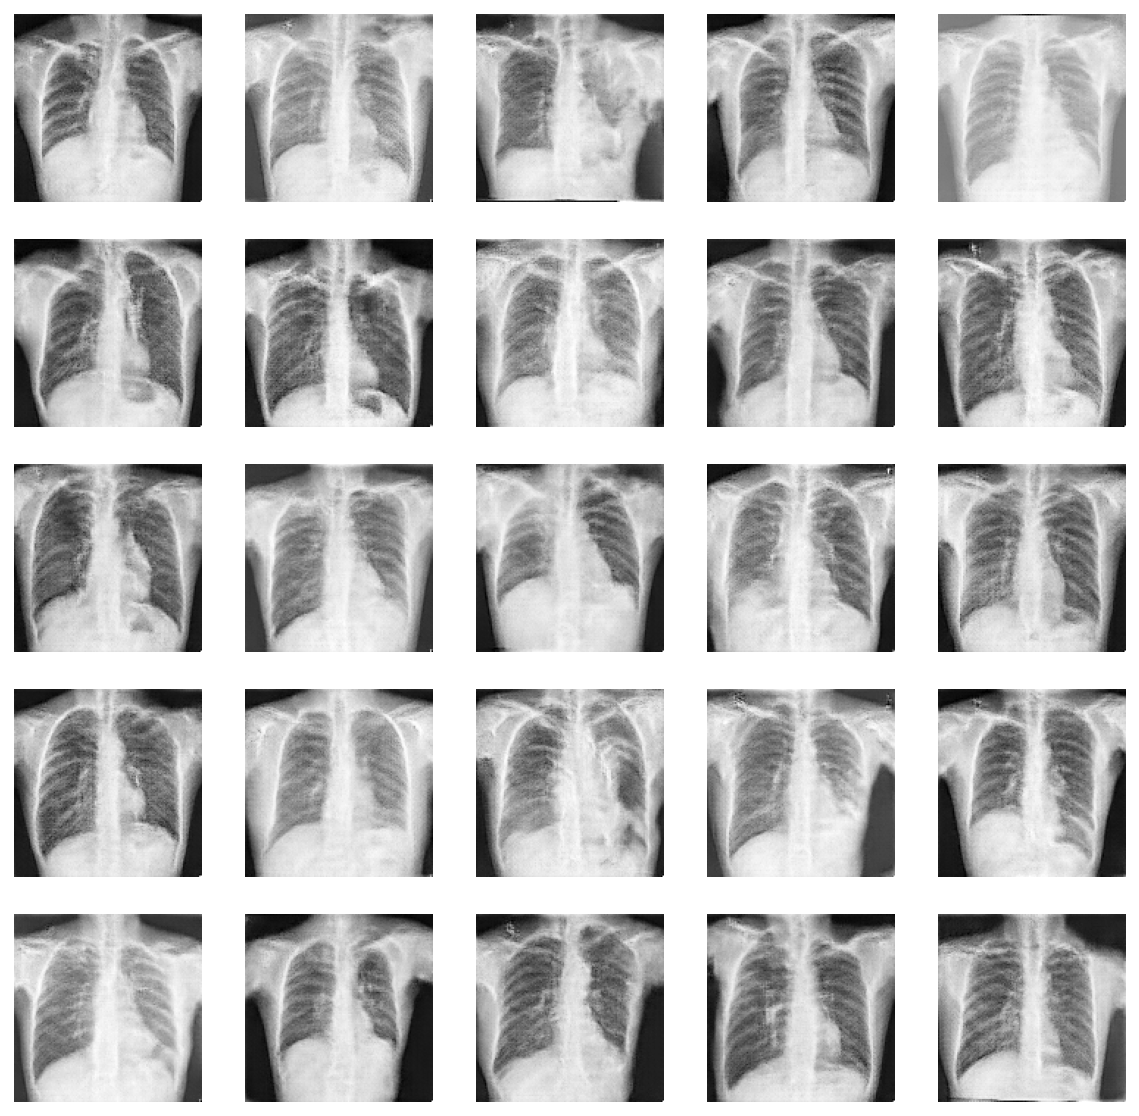

In [21]:
plot_fakes('fake_samples.pdf')